# Исследование рынка общественного питания в Москве

**Цель исследования**
* На основе открытых данных проанализировать рынок общественного питания в Москве и определить наиболее выгодный для открытия формат

## 1. Подготовка данных

**Импорт библиотек**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy.stats as stats
from scipy import stats as st
import numpy as np
from io import BytesIO
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [52]:
pd.set_option('max_colwidth', 400)
sns.set(rc={'figure.figsize':(16, 7)})

**Работа с данными**

In [53]:
data = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/rest_data.csv')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [55]:
print('Количество дубликатов в данных:', data.duplicated().sum())

Количество дубликатов в данных: 0


- Данные верного типа, дубликаты отсутствуют

In [56]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [57]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Приведу название, тип и адрес кафе к нижнему регистру. Поменяю названия пары видов на более понятные

In [58]:
data['object_name'] = data['object_name'].str.lower()
data['object_type'] = data['object_type'].str.lower()
data['address'] = data['address'].str.lower()
data = data.rename(columns={'number':'seats_number'})
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
data['object_type'] = data['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

In [59]:
print('Количество дубликатов в названиях объектов недвижимости:', data['object_name'].duplicated().sum())

Количество дубликатов в названиях объектов недвижимости: 5442


- Дубликаты в данном столбце говорят о повторяющихся сетевых заведениях 

In [60]:
print('Количество дубликатов в адресах:', data['address'].duplicated().sum())

Количество дубликатов в адресах: 6258


- Дубликаты в данных с адресами говорят о популярных адресах, по которым часто находятся несколько заведений.

In [61]:
print('Количество дубликатов без учета id:', data[['object_name', 'chain', 'object_type', 'address', 'seats_number']].duplicated().sum())

Количество дубликатов без учета id: 85


- Данные дубликаты можно объяснить полным доминированием некоторых сетей питания, несправляющихся с объемами предложения своего продукта, в следствии чего открывающих вторую точку по тому же адресу

In [62]:
data.head()

,id,object_name,chain,object_type,address,seats_number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


## 2. Анализ данных

### 2.1 Соотношение видов объектов общественного питания к количеству

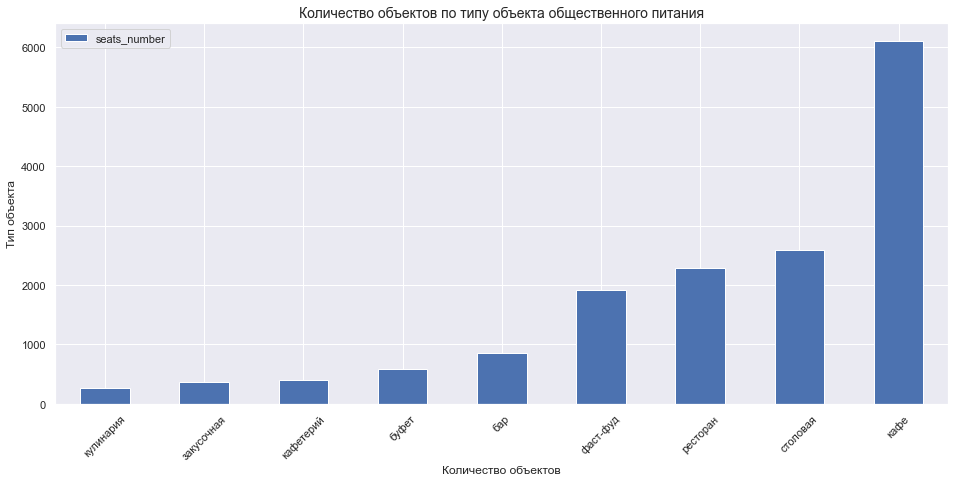

In [63]:
temp = data.groupby('object_type').count().reset_index()
ax = temp[['object_type', 'seats_number']].set_index('object_type').sort_values('seats_number', ascending=True).plot(kind='bar')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество объектов по типу объекта общественного питания', fontsize=14)
plt.xticks(rotation=45)
plt.show()

- По количеству объектов общественного питания лидирует "кафе", с отрывом более чем в 2 раза. Далее столовая, после ресторан и фаст-фуд. Остальные отстают еще в 2 раза

### 2.2 Соотношение сетевых и несетевых заведений по количеству

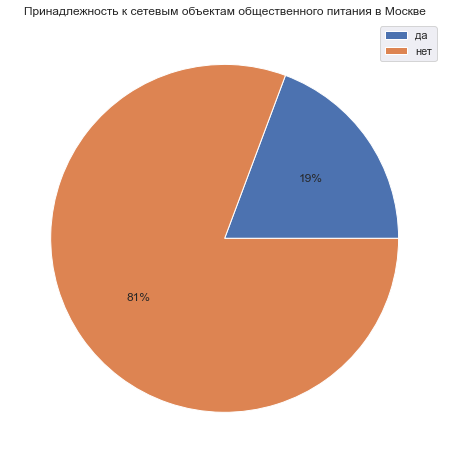

In [64]:
ax = data.groupby('chain')['object_name'].count().sort_values().plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, figsize=(8, 8), 
       title='Принадлежность к сетевым объектам общественного питания в Москве')
plt.show()

- Несетевых объектов питание в несколько раз больше сетевых

### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

In [65]:
chain = data.query('chain == "да"')

In [66]:
chain.groupby('object_type')['object_name'].count().sort_values(ascending=False)

object_type
кафе          1396
фаст-фуд       791
ресторан       544
кулинария       78
закусочная      56
кафетерий       52
бар             37
буфет           11
столовая         3
Name: object_name, dtype: int64

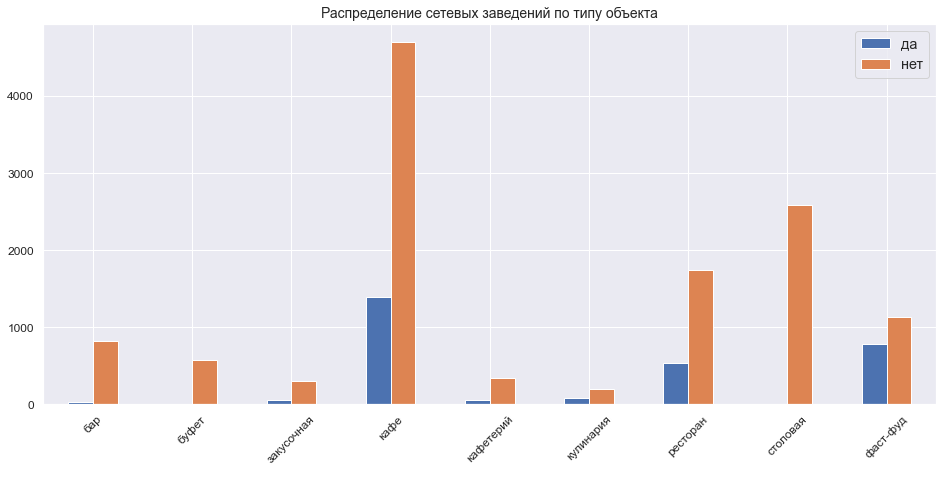

In [67]:
fig, ax = plt.subplots()
object_type_x_chain = data.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count')
object_type_x_chain.plot(kind = 'bar', ax=ax)
plt.title('Распределение сетевых заведений по типу объекта', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel(' ',fontsize=13)
plt.legend(fontsize ='large');

In [68]:
chains_to_total = (((object_type_x_chain['да'] / (object_type_x_chain['да'] + object_type_x_chain['нет'])) * 100)
                   .reset_index())

In [69]:
chains_to_total.columns=['object_type','ratio']
chains_to_total.sort_values(by='ratio', inplace=True, ascending=False)

In [70]:
chains_to_total

,object_type,ratio
8,фаст-фуд,41.133645
5,кулинария,28.571429
6,ресторан,23.807440
3,кафе,22.888998
2,закусочная,15.555556
4,кафетерий,13.065327
0,бар,4.322430
1,буфет,1.880342
7,столовая,0.115964


Сетевой тип характерен для:
* 41% фаст-фуд ресторанов;
* 29% кулинарий; 
* 24% ресторанов;
* 23% кафе.

### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

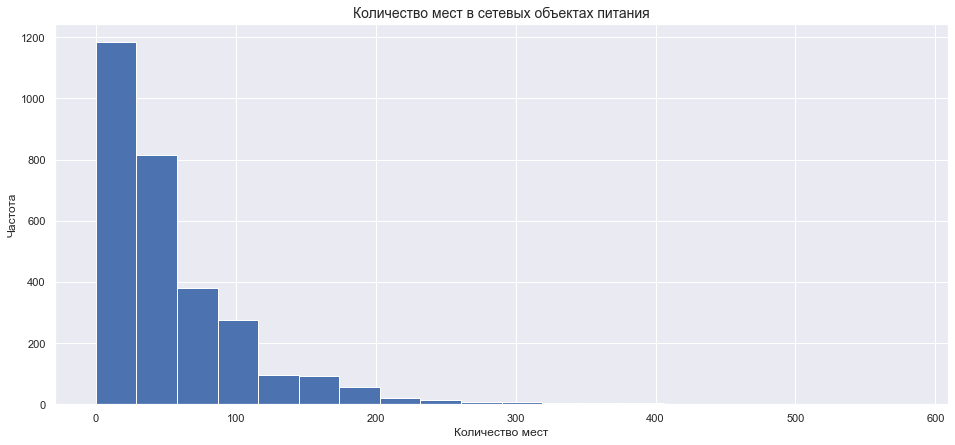

In [71]:
ax = chain['seats_number'].hist(bins=20)
ax.set_xlabel('Количество мест')
ax.set_ylabel('Частота')
ax.set_title('Количество мест в сетевых объектах питания', fontsize=14)
plt.show()

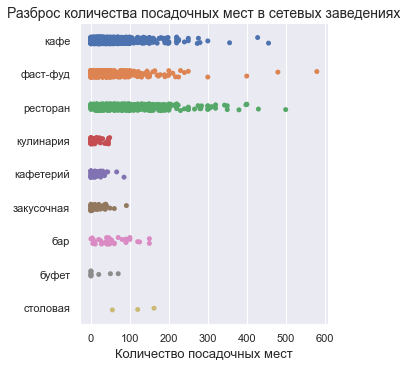

In [72]:
sns.catplot(data=chain, y='object_type', x='seats_number')
plt.title('Разброс количества посадочных мест в сетевых заведениях',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=13)
plt.ylabel('',fontsize=13);

- Можно видеть, что сетевым кафе, фаст-фуду и ресторанам свойственно большое количество заведений и количеством до 150 посадочных мест

Text(0.5, 0, 'Количество мест')

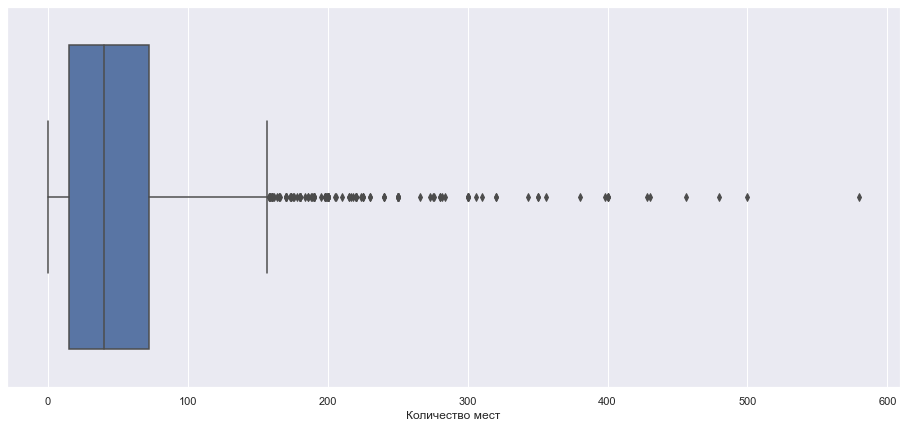

In [73]:
ax = sns.boxplot(x=chain['seats_number'])
ax.set_xlabel('Количество мест')

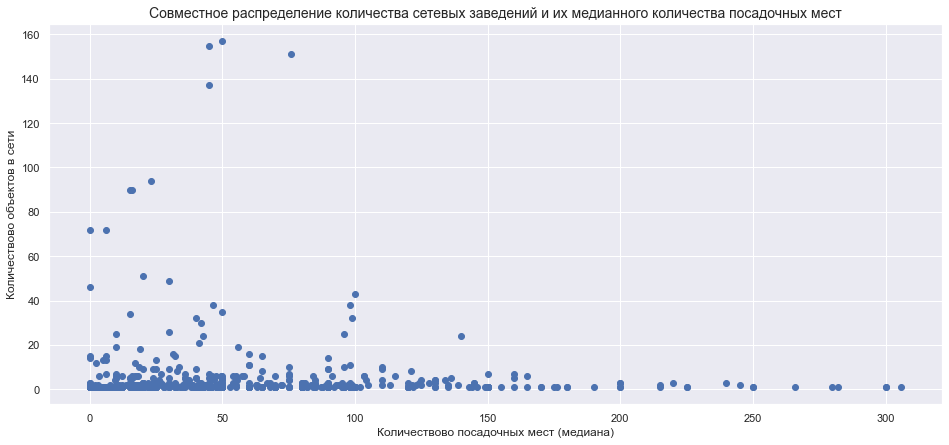

In [74]:
chain_objects = data.query('chain == "да"').groupby('object_name').agg({'object_name':'count', 'seats_number':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Количествово посадочных мест (медиана)')
plt.ylabel('Количествово объектов в сети')
plt.title('Совместное распределение количества сетевых заведений и их медианного количества посадочных мест', fontsize=14)
plt.show()

- **Сетевым объектам питания своейственно большое количество заведений и небольшое количество мест**

### 2.5 Среднее количество посадочных мест

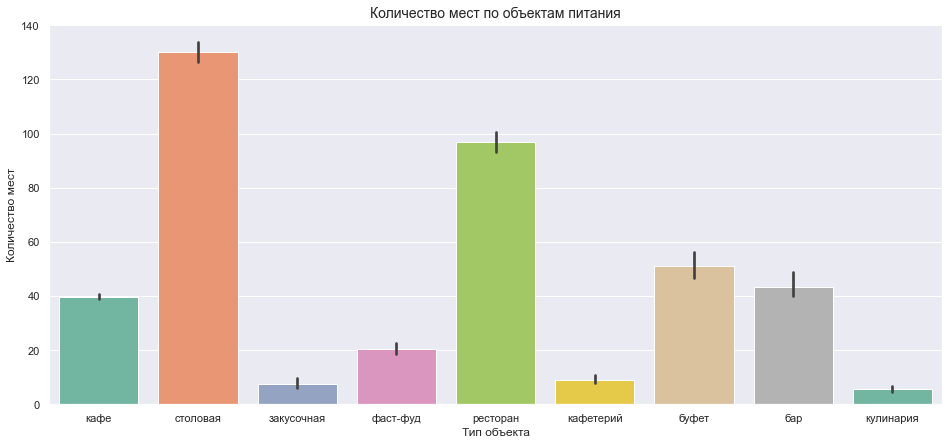

In [75]:
ax = sns.barplot(x='object_type', y='seats_number', data=data, palette="Set2")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Количество мест по объектам питания', fontsize=14)
plt.show()

Больше всего мест у столовой, что логично, так как такой формат обычно рассчитан на обеспечение питанием сотрудников предприятий, учебных заведений и крупных компаний. Далее идет ресторан, который по причине крупных вложений на этапе производства - дорогостоящий ремонт, соответствующий классу заведения, - вынужден ускорять возврат средств за счет большего пространства. После идут буфет, бар и кафе, со средним значением в 50 посадочных мест. В закусочных и кулинариях как правило номинальные посадочные места, большая часть потребителей прибретают на вынос

### 2.6 Информация об улице 

In [76]:
def streets(row):
    address = row['address']
    strt = address.split(",")[1]
    if strt[0]==' ':
        strt = strt[1:]
    return strt
data['street'] = data.apply(streets, axis = 1)

In [77]:
rest_data = data.query('street not in "город зеленоград"')

In [78]:
display(rest_data.head())

,id,object_name,chain,object_type,address,seats_number,street
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


### 2.7 Топ-10 улиц по количеству объектов общественного питания

In [79]:
top10_str = rest_data.groupby('street').agg({'id':'count'}).reset_index()
top10_street = top10_str.sort_values(by='id', ascending=False).head(10)
display(top10_street)

,street,id
1120,проспект мира,204
1124,профсоюзная улица,182
746,ленинградский проспект,171
1081,пресненская набережная,167
417,варшавское шоссе,161
749,ленинский проспект,147
1070,поселение сосенское,138
1117,проспект вернадского,132
737,кутузовский проспект,114
662,каширское шоссе,112


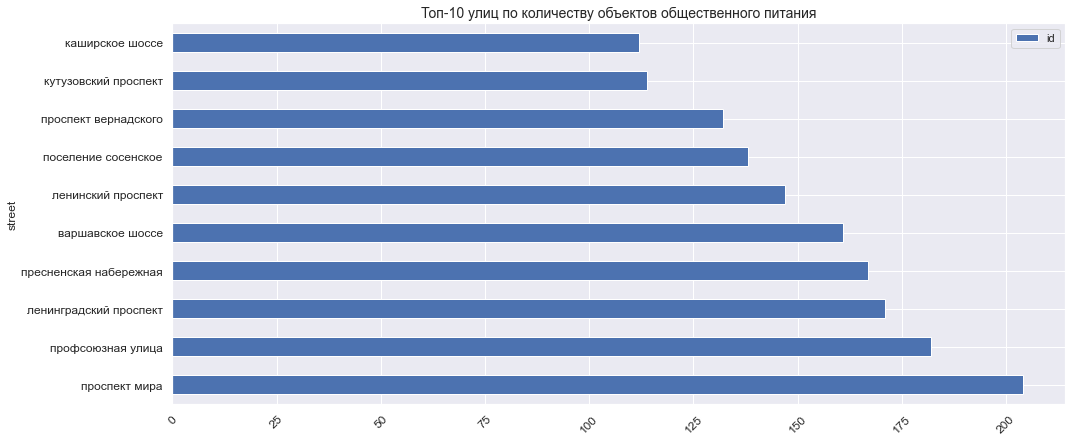

In [80]:
top10_street.plot(kind='barh', x='street')
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Районы Москвы**
* Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
* Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
* Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
* Пресненская набережная: Пресненский
* Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
* Ленинский проспект: Гагаринский и Донской
* Проспект Вернадского: Проспект Вернадского
* Кутузовский проспект: Дорогомилово, Фили-Давыдково
* Каширское шоссе: Нагатино-Садовники и Нагорный
* Ходынский бульвар: Хорошёвский

In [81]:
spreadsheet_id = '1jM9iOFYub3OKLzsepGf9casocQqJKY3ZBK947y7YIXc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
street_data = pd.read_csv(BytesIO(r.content))

In [82]:
street_data = street_data.drop('areaid', axis=1)
street_data.columns = ['street', 'county', 'district']
street_data['street'] = street_data['street'].str.lower()

In [83]:
street_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   street    4398 non-null   object
 1   county    4398 non-null   object
 2   district  4398 non-null   object
dtypes: object(3)
memory usage: 103.2+ KB


In [84]:
top_10_street = top10_street.merge(street_data, on=('street'), how='left')

In [85]:
top_10_street

,street,id,county,district
0,проспект мира,204,СВАО,Алексеевский район
1,проспект мира,204,СВАО,Ярославский Район
2,проспект мира,204,СВАО,Район Марьина роща
3,проспект мира,204,СВАО,Останкинский район
4,проспект мира,204,СВАО,Район Ростокино
5,проспект мира,204,СВАО,Район Свиблово
6,проспект мира,204,ЦАО,Мещанский район
7,профсоюзная улица,182,ЮЗАО,Академический район
8,профсоюзная улица,182,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,ЮЗАО,Район Ясенево


- Популярность этих улиц связана с тем, что они длинные, и, соответственно, довольно большое число заведений на них находятся вследствие значительного размера самих улиц.  

### 2.8 Улицы с одним объектом общественного питания

In [86]:
streets_count = data.groupby(['street'])['object_name'].count().reset_index()
streets_one_object = streets_count[streets_count['object_name'] == 1]

In [87]:
print("Количество улиц с одним объектом общественного питания:", streets_one_object['street'].count())

Количество улиц с одним объектом общественного питания: 579


In [88]:
streets_one_object

,street,object_name
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1
7,1-й вешняковский проезд,1
9,1-й голутвинский переулок,1
...,...,...
1889,ялтинская улица,1
1890,янтарный проезд,1
1895,ясногорская улица,1
1898,яузский бульвар,1


In [89]:
street_one_object = streets_one_object.merge(street_data, on=('street'), how='left')

In [90]:
print("Количество районов в которых находятся улицы с одним объектом общественного питания:", street_one_object.groupby(['district'])['object_name'].count().sum())

Количество районов в которых находятся улицы с одним объектом общественного питания: 560


In [91]:
street_one_object.groupby('district').count().sort_values('object_name').tail(10)

,street,object_name,county
district,,,
Район Замоскворечье,14,14,14
Район Сокольники,15,15,15
Мещанский район,16,16,16
Район Арбат,17,17,17
Район Марьина роща,18,18,18
Пресненский район,19,19,19
Тверской район,20,20,20
Басманный район,25,25,25
Район Хамовники,26,26,26


- Больше всего улиц с одним заведением в центре - множество переулков у которых тем неменее есть проходимый трафик

### 2.9 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

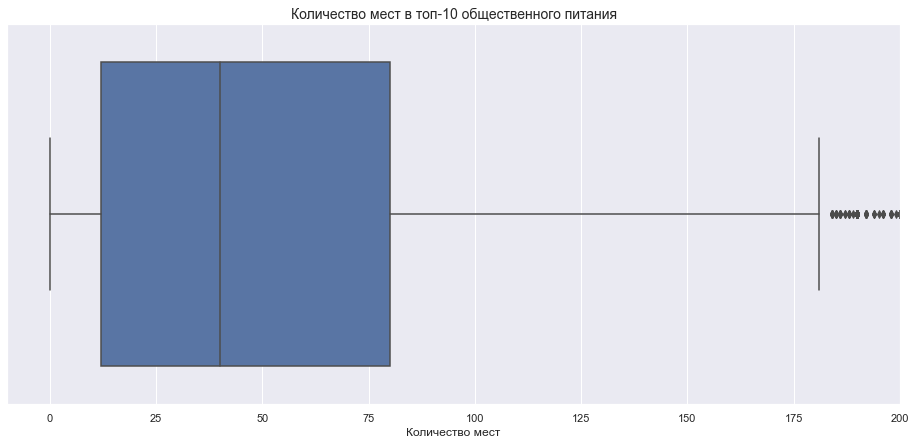

In [92]:
ax = sns.boxplot(x=data['seats_number'])
ax.set_xlim(-10,200)
ax.set_xlabel('Количество мест')
ax.set_title('Количество мест в топ-10 общественного питания', fontsize=14)
plt.show()

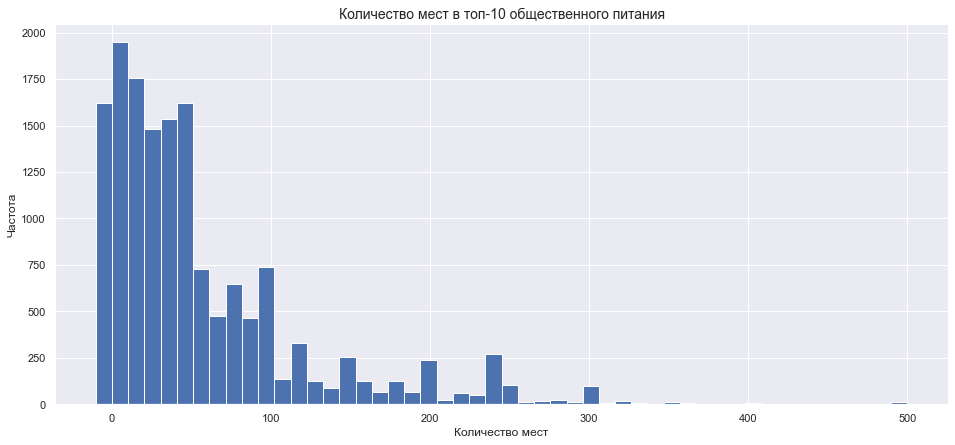

In [93]:
ax = data['seats_number'].hist(bins=50, range=(-10, 500))
ax.set_xlabel('Количество мест')
ax.set_ylabel('Частота')
ax.set_title('Количество мест в топ-10 общественного питания', fontsize=14)
plt.show()

Количество мест в данной категории меньше. На всех улицах топ-10 мы видим заведения, в основном, до 100 посадочных мест. Большие заведения уже являются исключением.

## 3. Общий вывод:

* в Москве доминирует формат кафе с общим количеством более 6000, при этом сетевых чуть больше 1000;
* сетевой формат свойственен впервую очередь фаст-фуду (43%), уже потом ресторанам, кафе и кулинариям (20-30%);
* сетевому формату свойственно небольшое количество посадочных мест (до 100), в кафе в среднем 40;
* несетевой формат кафе является высоко-конкурентным срезом рынка, при этом концепция высокотехнологичного обслуживания выгодно выделяет проект на фоне конкурентов;
* высокая концентрация также говорит о прибыльности сектора;
* доминирование заведений с небольшим количеством посадочных мест соответствует выбранному формату. Данный показатель отображает оптимально сформировавшийся размер кафе;
* **в качестве рекомендации для расположения кафе следует рассматривать одну из 10 наиболее посещаемых улиц, ориентируясь на арендные затраты и подготовку помещения. Формат должен быть сетевым кафе с небольшим количеством посадочных мест - такая концепция будет также менее затратной при масштабировании**

## Презентация

https://docs.google.com/presentation/d/1H1lftSnUrItAjTkhx9NODdp4_6D1LSo-/edit?usp=sharing&ouid=115943875866324512944&rtpof=true&sd=true